In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler,LabelEncoder,OrdinalEncoder,OneHotEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier,plot_tree
from sklearn.metrics import accuracy_score,classification_report,precision_score,recall_score,f1_score,confusion_matrix
from sklearn.ensemble import RandomForestClassifier,GradientBoostingClassifier
from imblearn.under_sampling import RandomUnderSampler

In [2]:
data = pd.read_csv("Heart Attack.csv")

In [3]:
data   #gender - 0 female, 1 male

,age,gender,impluse,pressurehight,pressurelow,glucose,kcm,troponin,class
0,64,1,66,160,83,160.0,1.80,0.012,negative
1,21,1,94,98,46,296.0,6.75,1.060,positive
2,55,1,64,160,77,270.0,1.99,0.003,negative
3,64,1,70,120,55,270.0,13.87,0.122,positive
4,55,1,64,112,65,300.0,1.08,0.003,negative
...,...,...,...,...,...,...,...,...,...
1314,44,1,94,122,67,204.0,1.63,0.006,negative
1315,66,1,84,125,55,149.0,1.33,0.172,positive
1316,45,1,85,168,104,96.0,1.24,4.250,positive
1317,54,1,58,117,68,443.0,5.80,0.359,positive


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1319 entries, 0 to 1318
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   age            1319 non-null   int64  
 1   gender         1319 non-null   int64  
 2   impluse        1319 non-null   int64  
 3   pressurehight  1319 non-null   int64  
 4   pressurelow    1319 non-null   int64  
 5   glucose        1319 non-null   float64
 6   kcm            1319 non-null   float64
 7   troponin       1319 non-null   float64
 8   class          1319 non-null   object 
dtypes: float64(3), int64(5), object(1)
memory usage: 92.9+ KB


In [5]:
data.describe()

,age,gender,impluse,pressurehight,pressurelow,glucose,kcm,troponin
count,1319.000000,1319.000000,1319.000000,1319.000000,1319.000000,1319.000000,1319.000000,1319.000000
mean,56.191812,0.659591,78.336619,127.170584,72.269143,146.634344,15.274306,0.360942
std,13.647315,0.474027,51.630270,26.122720,14.033924,74.923045,46.327083,1.154568
min,14.000000,0.000000,20.000000,42.000000,38.000000,35.000000,0.321000,0.001000
25%,47.000000,0.000000,64.000000,110.000000,62.000000,98.000000,1.655000,0.006000
50%,58.000000,1.000000,74.000000,124.000000,72.000000,116.000000,2.850000,0.014000
75%,65.000000,1.000000,85.000000,143.000000,81.000000,169.500000,5.805000,0.085500
max,103.000000,1.000000,1111.000000,223.000000,154.000000,541.000000,300.000000,10.300000


In [6]:
data.isnull()

,age,gender,impluse,pressurehight,pressurelow,glucose,kcm,troponin,class
0,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...
1314,False,False,False,False,False,False,False,False,False
1315,False,False,False,False,False,False,False,False,False
1316,False,False,False,False,False,False,False,False,False
1317,False,False,False,False,False,False,False,False,False


In [7]:
data.duplicated().sum()

np.int64(0)

In [8]:
'''class_data = data[['class']]
pd.get_dummies(class_data)'''

"class_data = data[['class']]\npd.get_dummies(class_data)"

In [9]:
'''class_encoding = OneHotEncoder(drop='first')
ar = class_encoding.fit_transform(class_data).toarray()
ar'''

"class_encoding = OneHotEncoder(drop='first')\nar = class_encoding.fit_transform(class_data).toarray()\nar"

In [10]:
#data['class'] = pd.DataFrame(ar,columns=['class'])

In [11]:
data

,age,gender,impluse,pressurehight,pressurelow,glucose,kcm,troponin,class
0,64,1,66,160,83,160.0,1.80,0.012,negative
1,21,1,94,98,46,296.0,6.75,1.060,positive
2,55,1,64,160,77,270.0,1.99,0.003,negative
3,64,1,70,120,55,270.0,13.87,0.122,positive
4,55,1,64,112,65,300.0,1.08,0.003,negative
...,...,...,...,...,...,...,...,...,...
1314,44,1,94,122,67,204.0,1.63,0.006,negative
1315,66,1,84,125,55,149.0,1.33,0.172,positive
1316,45,1,85,168,104,96.0,1.24,4.250,positive
1317,54,1,58,117,68,443.0,5.80,0.359,positive


In [12]:
x = data.iloc[:,:-1]
y = data['class']

In [13]:
X_train,X_test,Y_train,Y_test = train_test_split(x,y,test_size=0.2,random_state=4)

In [14]:
decision = DecisionTreeClassifier(max_depth=4,random_state=42)
decision.fit(X_train,Y_train)

DecisionTreeClassifier(max_depth=4, random_state=42)

In [15]:
Y_pred = decision.predict(X_test)
Y_pred

array(['negative', 'positive', 'positive', 'negative', 'positive',
       'positive', 'positive', 'negative', 'negative', 'positive',
       'negative', 'positive', 'positive', 'positive', 'negative',
       'positive', 'negative', 'positive', 'negative', 'negative',
       'positive', 'positive', 'negative', 'negative', 'positive',
       'negative', 'positive', 'positive', 'negative', 'positive',
       'positive', 'positive', 'positive', 'positive', 'positive',
       'negative', 'positive', 'positive', 'positive', 'negative',
       'positive', 'positive', 'positive', 'negative', 'positive',
       'positive', 'negative', 'negative', 'positive', 'negative',
       'positive', 'positive', 'positive', 'negative', 'negative',
       'positive', 'negative', 'positive', 'negative', 'negative',
       'positive', 'negative', 'negative', 'positive', 'negative',
       'positive', 'negative', 'negative', 'negative', 'negative',
       'negative', 'positive', 'positive', 'negative', 'negati

In [16]:
accuracy = accuracy_score(Y_test,Y_pred)*100
precision= precision_score(Y_test,Y_pred,average='weighted')*100
recall= recall_score(Y_test,Y_pred,average='weighted')*100
f1score= f1_score(Y_test,Y_pred,average='weighted')*100

In [17]:
print(f"Accuracy : {accuracy:.2f} ")
print(f"Precision : {precision:.2f} ")
print(f"Recall : {recall:.2f} ")
print(f"F1_Score : {f1score:.2f} ")

Accuracy : 98.48 
Precision : 98.49 
Recall : 98.48 
F1_Score : 98.48 


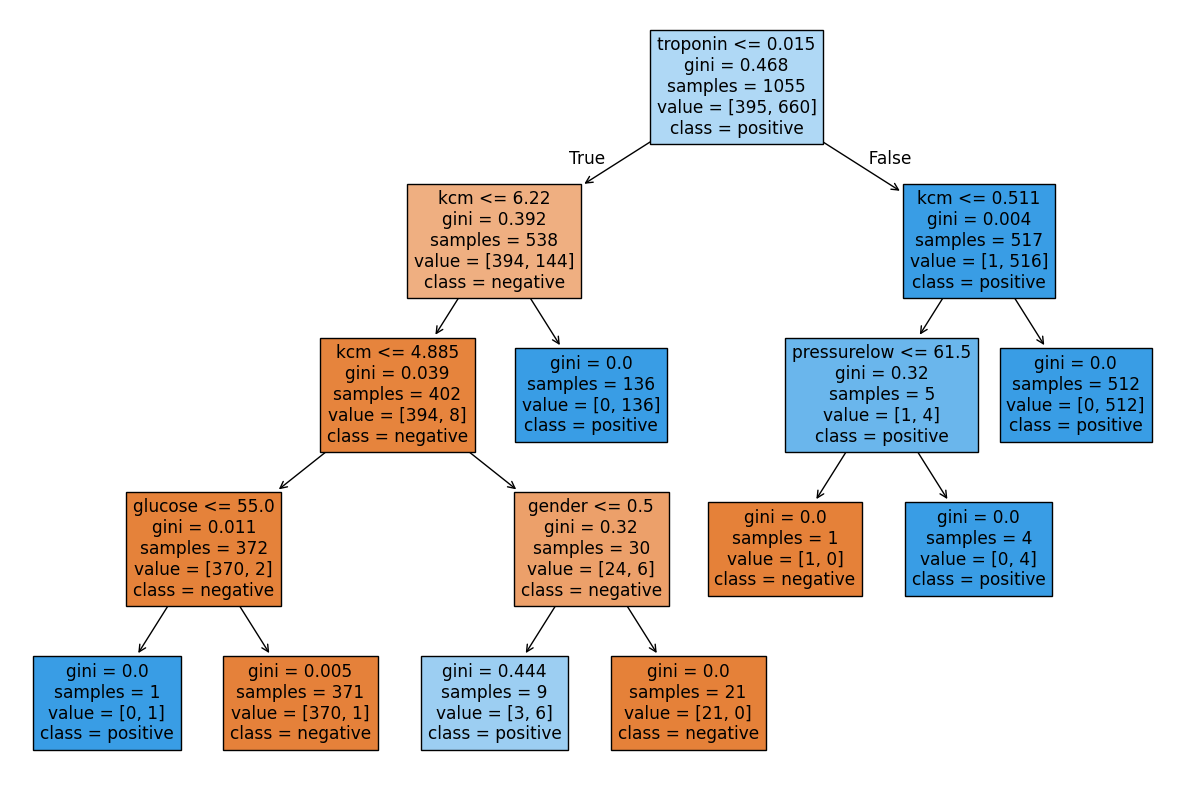

In [18]:
plt.figure(figsize=(15,10))
plot_tree(decision,class_names=y.unique(),feature_names=x.columns,filled=True)
plt.show()

# Random Forest Bagging Decision Tree

In [19]:
model = RandomForestClassifier(n_estimators=50,random_state=42)
model.fit(X_train,Y_train)

RandomForestClassifier(n_estimators=50, random_state=42)

In [20]:
Y_pred = model.predict(X_test)

In [21]:
accuracy = accuracy_score(Y_test,Y_pred)*100
precision= precision_score(Y_test,Y_pred,average='weighted')*100
recall= recall_score(Y_test,Y_pred,average='weighted')*100
f1score= f1_score(Y_test,Y_pred,average='weighted')*100

In [22]:
print(f"Accuracy : {accuracy:.2f} ")
print(f"Precision : {precision:.2f} ")
print(f"Recall : {recall:.2f} ")
print(f"F1_Score : {f1score:.2f} ")

Accuracy : 96.97 
Precision : 96.99 
Recall : 96.97 
F1_Score : 96.97 


# Gradient Boosting 

In [23]:
model = GradientBoostingClassifier(random_state=42)
model.fit(X_train,Y_train)

GradientBoostingClassifier(random_state=42)

In [24]:
Y_pred = model.predict(X_test)

In [25]:
accuracy = accuracy_score(Y_test,Y_pred)*100
precision= precision_score(Y_test,Y_pred,average='weighted')*100
recall= recall_score(Y_test,Y_pred,average='weighted')*100
f1score= f1_score(Y_test,Y_pred,average='weighted')*100

In [26]:
print(f"Accuracy : {accuracy:.2f} ")
print(f"Precision : {precision:.2f} ")
print(f"Recall : {recall:.2f} ")
print(f"F1_Score : {f1score:.2f} ")

Accuracy : 96.97 
Precision : 96.99 
Recall : 96.97 
F1_Score : 96.97 
